# TAREA

KEVIN EMILIANO AYALA MONTOYA 745973

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

Para ahorra líneas de código, observando que las integrales definidas tienen el mismo limite inferior (a), y el mismo limite superior (b); los definiremos desde antes para su implememtación en su solición. Así como el array de nuestros términos que se usarán es la aproximación.

In [185]:
a, b = 1, 3

In [186]:
N = np.logspace(1, 5, 5)

También definiremos la función de integración de Montecarlo:

In [187]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b - a)

$\int_{1}^{3} e^{x}\log(x)\text{d}x$.

Para tener mejor percepción de problema incluiremos la representación visual de la integral

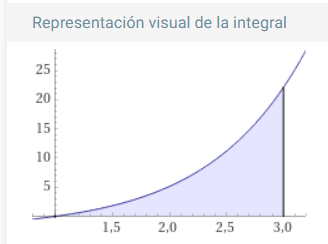

Definimos nuestra función a integrar:

In [188]:
def f1(x):
    return (np.exp(x)* np.log(x))

Iniciamos la tabla en donde se mostrará la aproximación y el error, teniendo como columnas el número de términos a utilizar:

In [189]:
table1 =  pd.DataFrame(columns = ["Aproximación", "Error"], index = N)

Iniciamos un for que reiterará en cada término de nuestro array N, y dentro de este llamara a la función montecarlo que calculara la aproximación con la cantidad de términos correspondiente a la casilla del array en la que se encuantra la variable i; el error lo calculará restando el resultado de resolverla en Wolfram con el valor de nuestra aproximación. Y estos datos los colocará en su celda correspondiente de la tabla.

In [190]:
for i in N:
    aprox = montecarlo(f1, int(i), a, b)
    table1.loc[i, "Aproximación"] = aprox
    table1.loc[i, "Error"] = (14.0275) - aprox
    
table1

,Aproximación,Error
10.0,21.011265,-6.983765
100.0,15.229832,-1.202332
1000.0,14.164676,-0.137176
10000.0,14.141741,-0.114241
100000.0,14.032577,-0.005077


$\int_1^3 \sin(x)\ln(x) \text{d}x$

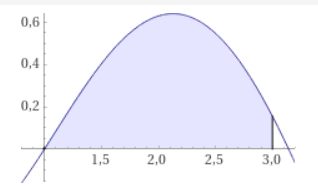

Definimos nuestra función a integrar:

In [191]:
def f2(x):
    return (np.sin(x)*np.log(x))

Iniciamos la tabla en donde se mostrará la aproximación y el error, teniendo como columnas el número de términos a utilizar:

In [192]:
table2 =  pd.DataFrame(columns = ["Aproximación", "Error"], index = N)

Iniciamos un for que reiterará en cada término de nuestro array N, y dentro de este llamara a la función montecarlo que calculara la aproximación con la cantidad de términos correspondiente a la casilla del array en la que se encuantra la variable i; el error lo calculará restando el resultado de resolverla en Wolfram con el valor de nuestra aproximación. Y estos datos los colocará en su celda correspondiente de la tabla.

In [193]:
for i2 in N:
    aprox2 = montecarlo(f2, int(i2), a, b)
    table2.loc[i2, "Aproximación"] = aprox2
    table2.loc[i2, "Error"] = (0.869844) - aprox2
    
table2

,Aproximación,Error
10.0,0.948265,-0.078421
100.0,0.855454,0.01439
1000.0,0.863693,0.006151
10000.0,0.86451,0.005334
100000.0,0.871524,-0.00168


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [194]:
def bernoulli(x, y):
    return (((x**2) + (2*y**2)) <= ((-2*x) + (8*y) - 7))

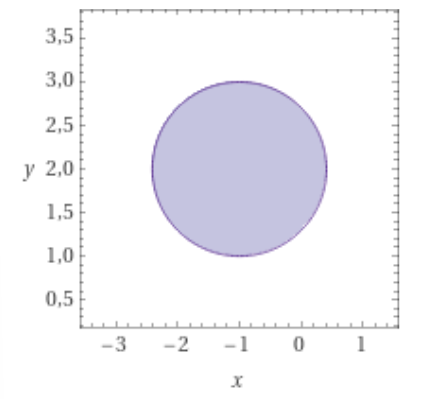

Definimos los limites de x y de y

In [216]:
a1 = -1-np.sqrt(2)
b1 = np.sqrt(2) - 1
a2 = 1
b2 = 3

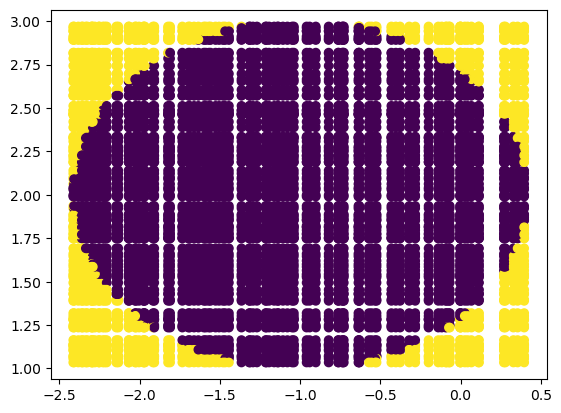

In [217]:
x = np.random.uniform(a1, b1 , 100)
y = np.random.uniform(1, 3, 100)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=~ bernoulli(X, Y))

In [218]:
def montecarlo2(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

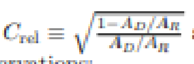

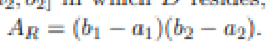

In [219]:
AR = (b1 - a1) * (b2 * a2)

In [224]:
table3 =  pd.DataFrame(columns = ["Aproximación", "Error relativo"], index = N)
for i3 in N:
    aprox = montecarlo2(bernoulli, a1, b1, a2, b2, int(i3))
    Crel = np.sqrt((1 - aprox / AR) / (aprox / AR))
    table3.loc[i3, "Aproximación"] = aprox
    table3.loc[i3, "Error relativo"] = Crel
    
table3

,Aproximación,Error relativo
10.0,3.959798,1.069045
100.0,4.186072,1.013423
1000.0,4.440631,0.954373
10000.0,4.376142,0.969013
100000.0,4.448211,0.952666


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

### Evaluación de rendimiento de sistemas: 

En la ingeniería de sistemas computacionales, a menudo se necesita evaluar el rendimiento de un sistema complejo que consta de varios componentes interdependientes. La integración Monte Carlo se puede utilizar para simular el comportamiento del sistema bajo diferentes condiciones y estimar el rendimiento del sistema. Por ejemplo, se puede utilizar para determinar el número de usuarios que un sitio web puede manejar simultáneamente, o para evaluar el rendimiento de un sistema de almacenamiento en la nube bajo diferentes cargas de trabajo.

### Verificación de sistemas: 

La integración Monte Carlo se puede utilizar para verificar el correcto funcionamiento de sistemas computacionales. Por ejemplo, se puede simular el comportamiento de un sistema de control de tráfico aéreo para detectar posibles situaciones peligrosas o conflictos entre aviones. También se puede utilizar para verificar el correcto funcionamiento de sistemas de seguridad críticos, como los sistemas de frenado automático de un automóvil.

### Optimización de sistemas: 

La integración Monte Carlo también se puede utilizar para optimizar el diseño de sistemas computacionales. Por ejemplo, se puede utilizar para encontrar la mejor configuración de hardware y software para un sistema de procesamiento de datos en tiempo real, o para encontrar la mejor política de programación para un sistema de gestión de inventario. En este caso, se pueden realizar simulaciones de Monte Carlo para evaluar el rendimiento del sistema bajo diferentes configuraciones y políticas, y luego seleccionar la mejor opción.

## Referencias: 

MIT OpenCourseWare. (n.d.). MIT OpenCourseWare. https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf